In [1]:
import pandas as pd
# if you don't have this installed: pip install scikit-learn
from sklearn import datasets
import matplotlib.pyplot as plt

### Flowers!
For our first dataset, let's explore one of the most famous toy datasets out there: iris

In [2]:
# A dataset of flowers!
iris = datasets.load_iris(as_frame=True).frame

In [3]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# What's going on with that "target" column?
# We can probably clean that up into something more readable...

#The "map" function allows us to overwrite data points based on a dictionary
# i.e. if something in the series matches one of the keys, it is replaced with the corresponding value
iris["species"] = iris["target"].map({0: "setosa", 1: "versicolor", 2:"virginica"})

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# I don't love the column names including the units, so I'll clean those up (renaming columns)
# Rename works a whole lot like `map`
iris = iris.rename(columns={"sepal length (cm)":"sepal length", "sepal width (cm)": "sepal width", "petal length (cm)":"petal length", "petal width (cm)":"petal width"})
#remove the "target" column, since it's now redundant
iris.drop('target', axis=1, inplace=True)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


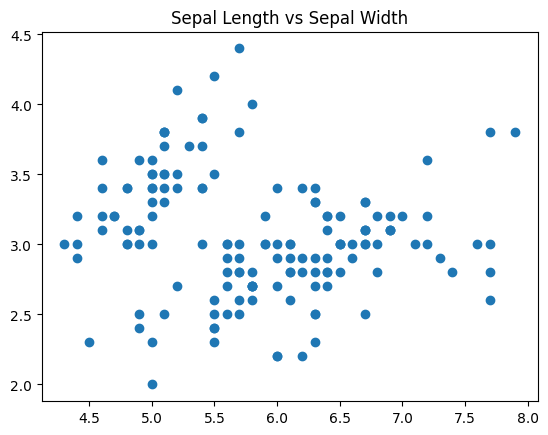

In [59]:
# with the subplots method, we can create a matplotlib figure
fig, ax = plt.subplots()
#the scatter function makes our figure into a scatterplot
ax.scatter(iris["sepal length"], iris["sepal width"])
#One of many functions to alter the figure's style:
plt.title("Sepal Length vs Sepal Width")
#display the figure to the screen
plt.show()

You can look at the full documentation of what kind of plots MatPlotLib can handle [here](https://matplotlib.org/stable/plot_types/index.html).

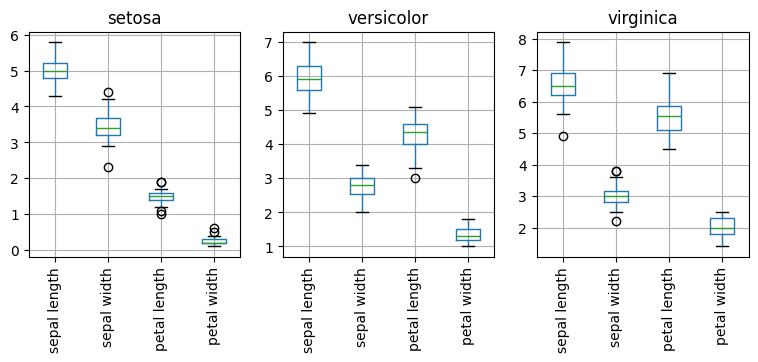

In [7]:
# Maybe we could look at differences per species?

# We're making a 3-columned figure -- 3 columns and a 9 by 3 figure size
fig, ax = plt.subplots(ncols=3, figsize=(9, 3)) 

#The groupby method allows us to group our data by particular columns
iris.groupby("species").boxplot(
    ax=ax, #connecting this boxplot method to the axes object we created above
    rot=90, #rotating the x axis labels so they are more readable (try changing this number and see what it looks like!)
    sharey=False, #We need to specify these as false when we run a groupby, else we'll get some angry warnings
    sharex=False
)

plt.show()

#Notice how the structure of the above code is a good bit different than the previous one!
# With pandas and matplotlib, we can either call a plot method on the pandas dataframe (what we do here), 
#     or pass the dataframe to a matplotlib method (what we do in the previous example)

# Other thing to notice... the scales are misleading!

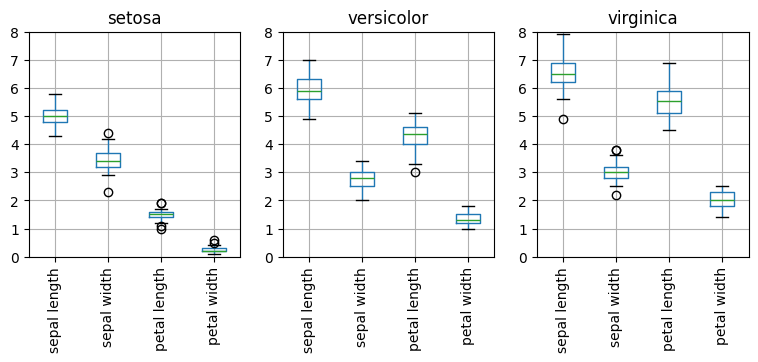

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3)) 

iris.groupby("species").boxplot(
    ax=ax,
    rot=90,
    sharey=False,
    sharex=False
)

#Set the y axis to be uniform across all three subplots
plt.setp(ax, ylim=(0, 8))

plt.show()

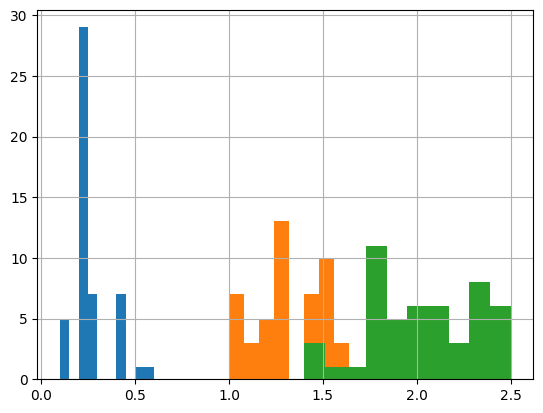

In [9]:
# The petal width seemed pretty distinct between these three flowers... let's more strictly just compare those
fig, ax = plt.subplots()
iris.groupby("species")["petal width"].hist(ax=ax)

plt.show()

### Wine

In [ ]:
# a dataset of wine
wine = datasets.load_wine(as_frame=True).frame

In [25]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Breast Cancer

In [ ]:
# a breast cancer dataset
cancer = datasets.load_breast_cancer(as_frame=True).frame

In [31]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
